In [1]:
# Importation des modules 
import pandas as pd 
import nltk 
import seaborn as sns
import re
import random 

In [2]:
# Configuration des modules 
sns.set(style="whitegrid")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nsoke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nsoke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv('apple-twitter-sentiment-texts.csv')

In [4]:
data.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


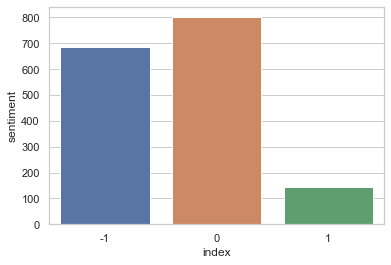

In [5]:
df = pd.DataFrame(data.sentiment.value_counts())
df = df.reset_index()
sns.barplot(x='index',y='sentiment',data=df)

In [6]:
txt = ""

In [7]:
# Affichage de quelques tweets pris au hasard
for i in range(5):
    l = random.choice(range(data.shape[0]))
    print(data.text[l])
    txt += data.text[l] + " "

Great service at @Apple #BethesdaRow thanks Jenna and Brandon!!!!!!!
@jengolbeck @Apple introducing iGlove, an Apple product allowing one to single-handedly operate an iPhone 6.
. @apple why is my computer so slow
@apple #YosemiteProblems Erases my saved pass words every day. This is getting annoying.
Check out our Founder @gernieb views on @Apple &amp; @facebook #EggFreezing benefits for female engineers: https://t.co/vHZ1RcNWru #WomenInTech


In [8]:
x = re.search(r"(#[\w]+[\W]?)|(@[\w]+[\W]?)", txt) # tag et hashtag
#x = re.sub("[^\w\s]","",x) # ponctuation
#x = re.sub("http(\w*)","",x) # liens internet
print(x) 

<re.Match object; span=(17, 24), match='@Apple '>


In [9]:
def clean(txt):
    x = re.sub("(#[\w]+[\W]?)|(@[\w]+[\W]?)","", txt) # tag et hashtag
    x = re.sub("[^\w\s]","",x) # ponctuation
    x = re.sub("http(\w*)","",x) # liens internet
    x = x.lower() # Rendre en minuscule
    return x

In [10]:
# application à notre dataframe 
data.text = data.text.apply(lambda x : clean(x))

In [102]:
data.describe(include="all")

,text,sentiment
count,1630,1630.000000
unique,1594,NaN
top,Is Apple The Most Important Stock On Earth,NaN
freq,7,NaN
mean,NaN,-0.333129
std,NaN,0.630760
min,NaN,-1.000000
25%,NaN,-1.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [107]:
data['word_token'] = data.text.apply(lambda row: nltk.word_tokenize(row))

In [116]:
data.head()

,text,sentiment,token
0,Wow Yall needa step it up RT Music and snapch...,-1,"[Wow, Yall, needa, step, it, up, RT, Music, an..."
1,What Happened To Apple Inc,0,"[What, Happened, To, Apple, Inc]"
2,Thank u I can now compile all of the pics that...,1,"[Thank, u, I, can, now, compile, all, of, the,..."
3,The oddly uplifting story of the Apple cofound...,0,"[The, oddly, uplifting, story, of, the, Apple,..."
4,can i exchange my iphone for a different color...,0,"[can, i, exchange, my, iphone, for, a, differe..."


In [128]:
# Transformations du text 
# Stemm Porter
def porterstem(liste):
    return [nltk.stem.PorterStemmer().stem(word) for word in liste]
# Stemm Snow
def snowballstem(liste):
    return [nltk.stem.SnowballStemmer("english").stem(word) for word in liste]
# Lemma 
def lemma(liste):
    return [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in liste]

In [120]:
# for tweet
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [130]:
t = random.choice(range(data.shape[0]))
for word in data.token[t]:   
    print(word + " : ", lemmatizer.lemmatize(word)) 

Hey :  Hey
I :  I
think :  think
u :  u
need :  need
a :  a
new :  new
product :  product
iPster :  iPster


In [ ]:
from ntlk import sent_tokenize

In [ ]:
nltk.download('stopwords')

In [ ]:
# Effacement du bruit des données 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')